### Nobel Price


The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?

In [3]:
# Loading in required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the Nobel Prize data
nobel = pd.read_csv('nobel.csv')

# Taking a look at the first several winners
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


In [4]:
nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

### So, who gets the Nobel Prize?
Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?

(For country, we will use the birth_country of the winner, as the organization_country is NaN for all shared Nobel Prizes.)

In [5]:
# Total number of Nobel prices given till date
display(nobel.shape[0])

911

In [6]:
# No of Male and Females received Nobel Prices
nobel.sex.value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [7]:
# Top 10 Countries having Nobel price winners
nobel.birth_country.value_counts().nlargest(10)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

### USA dominance
Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

In [8]:
# creating a boolean column indicating whether the winner is American or Not
nobel['usa_born_winner'] = nobel['birth_country']=='United States of America'

# creating a decade column
nobel['decade']=np.floor(nobel['year']/10)*10
nobel['decade']=nobel.decade.astype('int')

# checking the proportion of USA winners in each decade
prop_usa_winners=np.round(nobel.groupby('decade')['usa_born_winner'].mean(),2)

###  USA dominance, visualized

Text(0, 0.5, 'Proportion of USA')

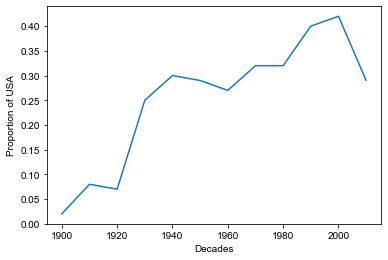

In [9]:
fig,ax=plt.subplots()
sns.set_style('dark')
prop_usa_winners.plot(kind='line')
ax.set_xlabel('Decades')
ax.set_ylabel('Proportion of USA')


## What is the gender of a typical Nobel Prize winner?
So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

In [10]:
# creating a boolean column indicating whether the winner is American or Not
nobel['female_winner']=nobel['sex']=='Female'

# checking the proportion of Female winners by Decade and Categorywise
prop_female_winners=nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()

Text(0, 0.5, 'Proportion of Female Winners')

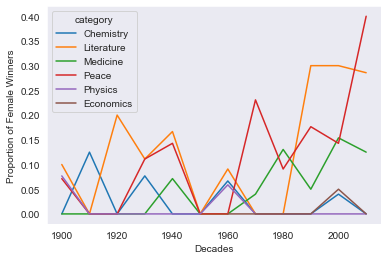

In [11]:
fig,ax=plt.subplots()
sns.set_style('dark')
sns.lineplot(x='decade',y='female_winner',data=prop_female_winners,hue='category')
ax.set_xlabel('Decades')
ax.set_ylabel('Proportion of Female Winners')


### The first woman to win the Nobel Prize
The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [12]:
nobel.query("sex=='Female'").head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [19]:
# selecting the people who won nobel price more than once
twice=nobel.groupby('full_name').filter(lambda x :len(x)>=2)

### How old are you when you get the prize?
The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

But how old are you generally when you get the prize?

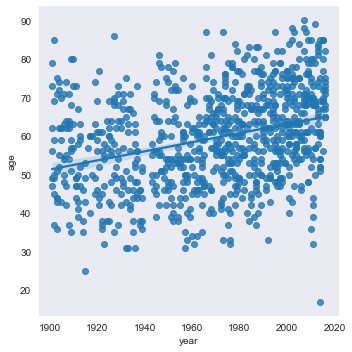

In [37]:
# converting the  birth date into datetime obj
nobel['birth_date']=pd.to_datetime(nobel['birth_date'])

# adding the column age 
nobel['age']=nobel['year']-nobel['birth_date'].dt.year

# visualization
sns.lmplot(data=nobel,x='year',y='age')

### Age differences between prize categories
The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let's look at age trends within different prize categories.

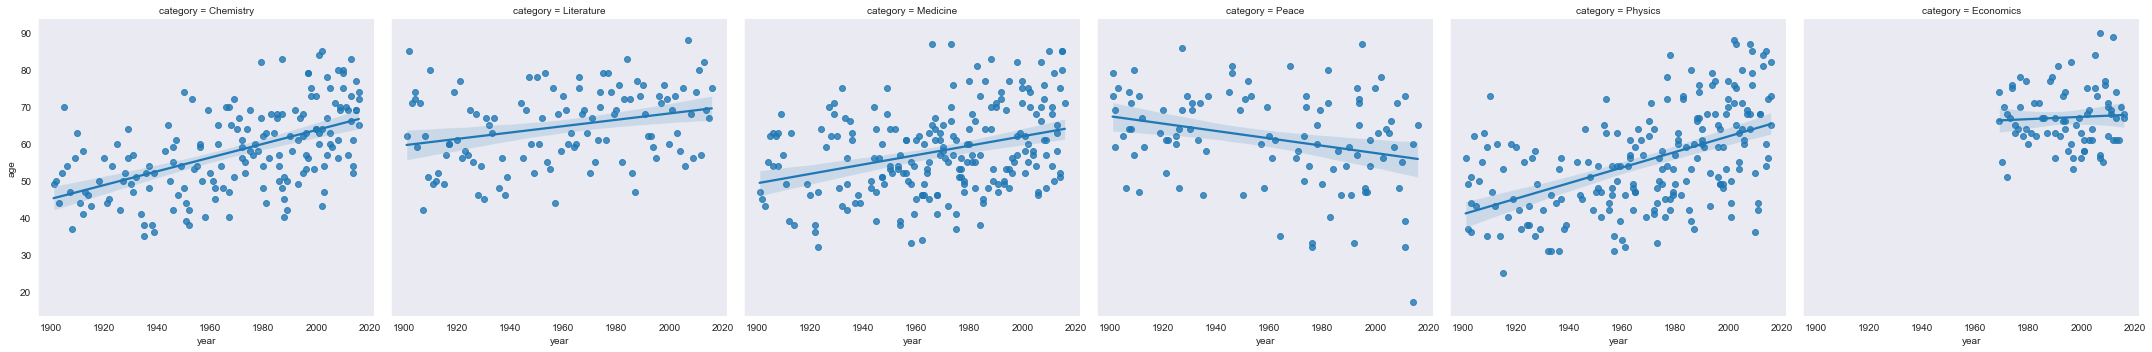

In [40]:
sns.lmplot(data=nobel,x='year',y='age',col='category')

### Oldest and youngest winners
More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [48]:
# The oldest winner of a Nobel Prize as of 2016
nobel.iloc[nobel['age'].idxmax()]
# The youngest winner of a Nobel Prize as of 2016
nobel.iloc[nobel['age'].idxmin()]


year                                                                 2014
category                                                            Peace
prize                                          The Nobel Peace Prize 2014
motivation              "for their struggle against the suppression of...
prize_share                                                           1/2
laureate_id                                                           914
laureate_type                                                  Individual
full_name                                                Malala Yousafzai
birth_date                                            1997-07-12 00:00:00
birth_city                                                        Mingora
birth_country                                                    Pakistan
sex                                                                Female
organization_name                                                     NaN
organization_city                     